In [1]:
import numpy as np
import os, random
from skimage import io
import matplotlib.pyplot as plt

In [51]:
folder  = '../data/'

In [80]:
import numpy as np

def linear_equation_generator(variables=1, max_coef=10, max_const=50):
    assert variables >= 1, "You need at least one variable to generate an equation"
    assert max_coef > 0 and max_const > 0, "Maximum coefficient and constant should be greater than 0"
    
    variable_list = ['x', 'y', 'z', 'w', 'a', 'b', 'c'][:variables]
    
    def random_term(variable):
        coef = np.random.randint(1, max_coef + 1)
        return f"{coef}{variable}" if coef != 1 else variable
    
    def random_constant():
        return np.random.randint(1, max_const + 1)
    
    equations = []
    
    for var in variable_list:
        left_coef1 = random_term(var)
        left_const1 = random_constant()
        
        right_coef2 = random_term(var)
        right_const2 = random_constant()
        
        left_side = f"{left_coef1}+{left_const1}"
        right_side = f"{right_coef2}+{right_const2}"
        
        equation = f"{left_side}={right_side}"
        equations.append(equation)
    
    return str(equations[0])

# Example usage:
print(linear_equation_generator(variables=1))


2x+43=10x+10


In [61]:
def equation_generator(numbers=2, max_num=100):
    assert numbers > 1, "You need at least two numbers to generate a valid equation"
    # Generate numbers and operator
    generated_eqn = []
    operators = ['+', '-', '*', '/']
    for number in range(numbers):
        gen_num = np.random.randint(max_num)
        generated_eqn.append(str(gen_num))
        operator_ind = np.random.randint(len(operators))
        operator = operators[operator_ind]
        generated_eqn.append(operator)
    # Remove the last operator and turn into string
    generated_eqn = generated_eqn[:-1]
    generated_eqn = ''.join(generated_eqn)
    ans = eval(generated_eqn)
    ans_string = '='+str(ans)
    return generated_eqn+ans_string
eqn = equation_generator(numbers=2, max_num=100)
print(eqn)

41-77=-36


In [12]:
def random_sample_file(directory):
    #  Randomly selects a file from a directory
    n=0
    random.seed()
    for root, dirs, files in os.walk(directory):
        for name in files:
            n += 1
            if random.uniform(0, n) < 1:
                rfile=os.path.join(root, name)
    return rfile

In [13]:
def generate_eqn_image(folder, eqn):
    eqn_array = []
    # 1. Pick correct file
    for char in eqn:
        if char == "*": char = 'times'
        char_folder = f"{folder}/{char}"
        file = random_sample_file(char_folder) # Randomly sample an image from the directory, each (45X45)
        img = io.imread(file)
        eqn_array.append(img)
    # 2. Concatenate all images together into 1 giant image
    eqn = np.hstack(eqn_array)
    return eqn
generate_eqn_image(folder, eqn)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
output_folder = "../equation_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

10-41=-31


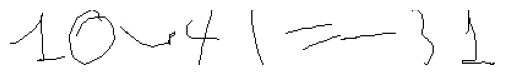

96+12=108


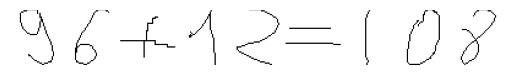

78*37=2886


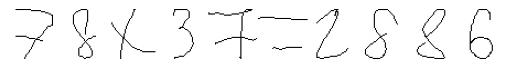

71+83=154


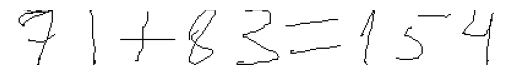

56+32=88


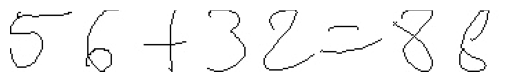

41+46=87


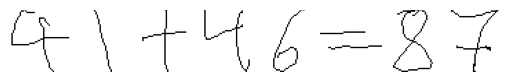

83*58=4814


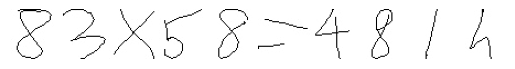

51+93=144


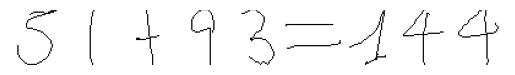

81+63=144


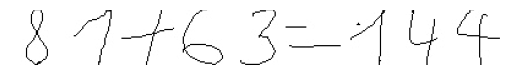

92-40=52


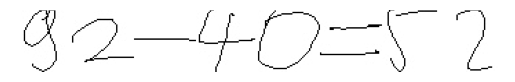

10*14=140


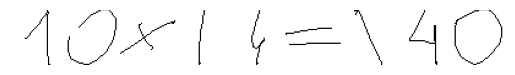

24-74=-50


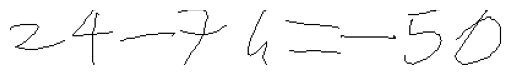

17+64=81


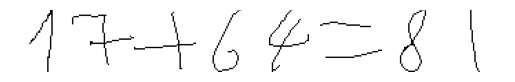

52-3=49


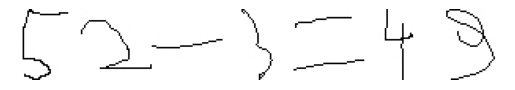

15-10=5


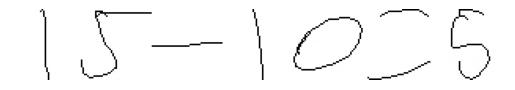

60-4=56


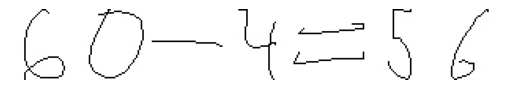

51+56=107


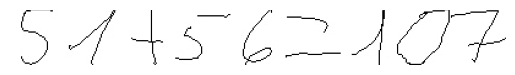

89+22=111


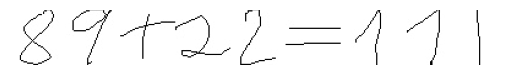

16-28=-12


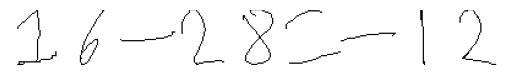

38+43=81


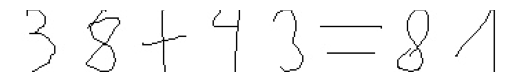

21*56=1176


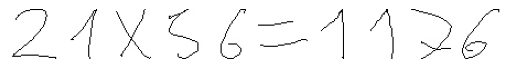

41*41=1681


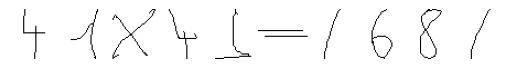

81-89=-8


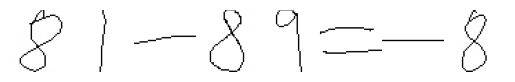

58-58=0


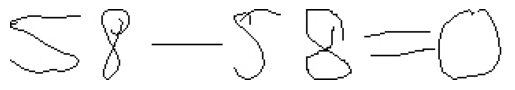

4+50=54


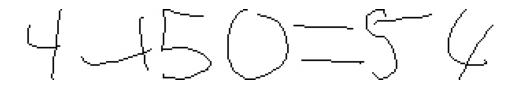

62+80=142


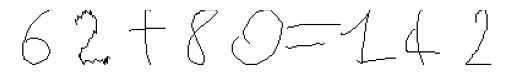

63*74=4662


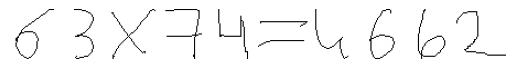

0*95=0


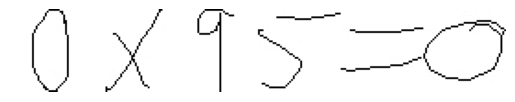

63+21=84


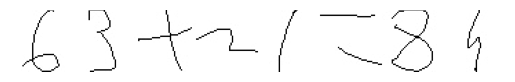

17+27=44


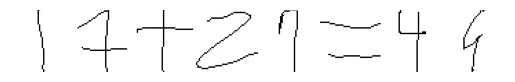

9-15=-6


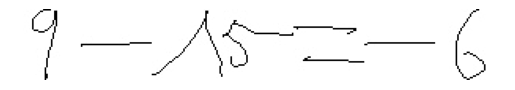

80-67=13


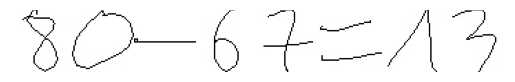

68-14=54


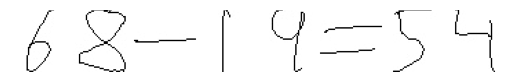

15*56=840


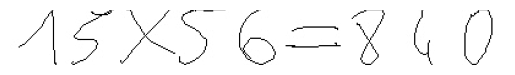

43*25=1075


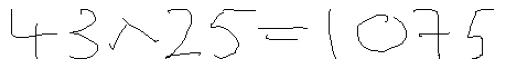

69*59=4071


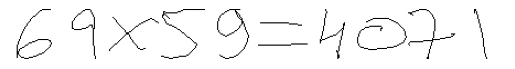

32-78=-46


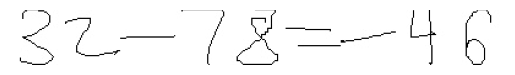

63*96=6048


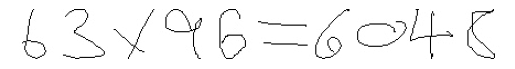

56+15=71


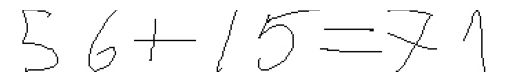

5*19=95


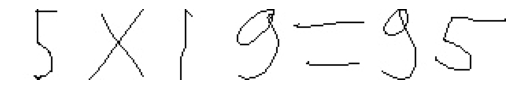

74-42=32


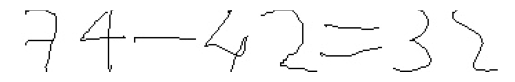

35-8=27


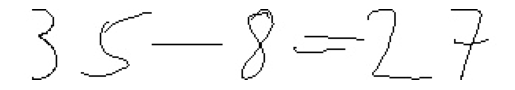

56-40=16


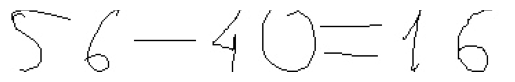

58+23=81


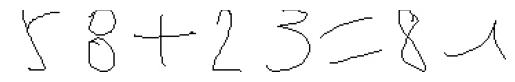

45*67=3015


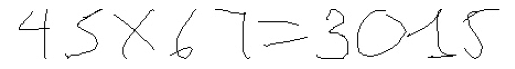

80+47=127


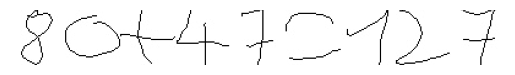

13*80=1040


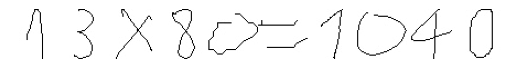

61-49=12


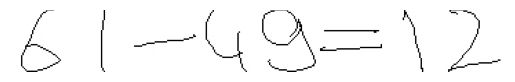

64-87=-23


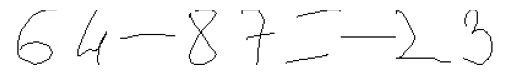

47+92=139


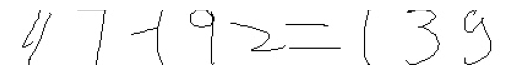

In [16]:
EQNS = 50
NUMBERS = 2 # We generate a set for two numbers
MAX_NUM = 100
SAVE = 1
for i in range(EQNS):
    eqn = equation_generator(numbers=NUMBERS, max_num=MAX_NUM)
    print(eqn)
    eqn_array = generate_eqn_image(folder, eqn)
    filename = f"{NUMBERS}numbers_{str(i).zfill(3)}.png"
    plt.imshow(eqn_array, cmap="gray")
    plt.axis('off')
    plt.savefig(output_folder+"/"+filename)
    plt.show()